In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import io
from google.colab import files
import requests
from IPython.display import display, HTML, Markdown
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import json

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

In [ ]:
#!pip install anthropic requests pandas numpy

AI-POWERED DATA EXPLANATION MODULE

In [ ]:

class IntelligentDataAgent:

    def __init__(self):
        self.df = None
        self.insights = []
        self.data_profile = {}
        self.patterns = []
        self.recommendations = []

    def analyze_and_explain(self, df):
        self.df = df.copy()
        self.insights = []
        self.patterns = []
        self.recommendations = []

        print("\n" + "="*70)
        print("INTELLIGENT AI AGENT - DATA ANALYSIS".center(70))
        print("="*70)
        print("\n🤖 AI Agent is analyzing your data with advanced intelligence...")
        print("   ⚡ No API required - Pure algorithmic intelligence!")

        self._profile_dataset()
        self._detect_patterns()
        self._analyze_relationships()
        self._generate_domain_insights()
        self._generate_recommendations()

        explanation = self._compile_explanation()

        print("\n" + "="*70)
        print("AI AGENT INSIGHTS ABOUT YOUR DATA".center(70))
        print("="*70)
        print(explanation)

        return explanation

    def _profile_dataset(self):
        self.data_profile = {
            'n_rows': len(self.df),
            'n_columns': len(self.df.columns),
            'memory_mb': self.df.memory_usage(deep=True).sum() / 1024**2,
            'numerical_cols': list(self.df.select_dtypes(include=[np.number]).columns),
            'categorical_cols': list(self.df.select_dtypes(include=['object']).columns),
            'datetime_cols': list(self.df.select_dtypes(include=['datetime64']).columns),
            'missing_data': {},
            'duplicates': self.df.duplicated().sum()
        }

        for col in self.df.columns:
            missing_pct = (self.df[col].isnull().sum() / len(self.df)) * 100
            if missing_pct > 0:
                self.data_profile['missing_data'][col] = {
                    'count': int(self.df[col].isnull().sum()),
                    'percentage': round(missing_pct, 2)
                }

        quality_factors = []
        quality_factors.append(100 - (len(self.data_profile['missing_data']) / max(len(self.df.columns), 1) * 50))
        quality_factors.append(100 - (self.data_profile['duplicates'] / max(len(self.df), 1) * 100))
        quality_factors.append(100 if len(self.df) > 100 else (len(self.df) / 100 * 100))
        self.data_profile['data_quality_score'] = int(np.mean(quality_factors))

        self.data_profile['dataset_type'] = self._infer_dataset_type()

    def _infer_dataset_type(self):
        columns_lower = ' '.join([col.lower() for col in self.df.columns])

        if 'churn' in columns_lower or 'retention' in columns_lower:
            return "Customer Churn Analysis"
        elif any(w in columns_lower for w in ['revenue', 'sales', 'profit']):
            return "Financial/Business Metrics"
        elif any(w in columns_lower for w in ['patient', 'disease', 'medical']):
            return "Healthcare/Medical Data"
        elif any(w in columns_lower for w in ['price', 'house', 'sqft', 'bedroom']):
            return "Real Estate Data"
        elif any(w in columns_lower for w in ['product', 'order', 'cart']):
            return "E-commerce/Retail Data"
        elif len(self.data_profile['datetime_cols']) > 0:
            return "Time Series Data"
        elif len(self.data_profile['numerical_cols']) > len(self.data_profile['categorical_cols']):
            return "Numerical Analytics Dataset"
        else:
            return "General Categorical Dataset"

    def _detect_patterns(self):
        from scipy import stats

        for col in self.data_profile['numerical_cols']:
            if self.df[col].isnull().all():
                continue

            values = self.df[col].dropna()

            try:
                skewness = stats.skew(values)
                if abs(skewness) > 1:
                    direction = "right-skewed" if skewness > 0 else "left-skewed"
                    self.patterns.append({
                        'feature': col,
                        'pattern': f"Significantly {direction} distribution",
                        'severity': 'high' if abs(skewness) > 2 else 'medium'
                    })
            except:
                pass

            try:
                Q1 = values.quantile(0.25)
                Q3 = values.quantile(0.75)
                IQR = Q3 - Q1
                outliers = ((values < (Q1 - 1.5 * IQR)) | (values > (Q3 + 1.5 * IQR))).sum()
                outlier_pct = (outliers / len(values)) * 100

                if outlier_pct > 5:
                    self.patterns.append({
                        'feature': col,
                        'pattern': f"{outlier_pct:.1f}% outliers detected",
                        'severity': 'high' if outlier_pct > 10 else 'medium'
                    })
            except:
                pass

        for col in self.data_profile['categorical_cols']:
            if self.df[col].isnull().all():
                continue

            value_counts = self.df[col].value_counts()

            if len(value_counts) > 1:
                most_common_pct = (value_counts.iloc[0] / len(self.df)) * 100
                if most_common_pct > 90:
                    self.patterns.append({
                        'feature': col,
                        'pattern': f"Highly imbalanced: {most_common_pct:.1f}% are '{value_counts.index[0]}'",
                        'severity': 'high'
                    })

            if len(value_counts) > 50:
                self.patterns.append({
                    'feature': col,
                    'pattern': f"High cardinality: {len(value_counts)} unique values",
                    'severity': 'medium'
                })

    def _analyze_relationships(self):
        numerical_cols = self.data_profile['numerical_cols']

        if len(numerical_cols) < 2:
            return

        try:
            corr_matrix = self.df[numerical_cols].corr()
            strong_correlations = []

            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    corr = corr_matrix.iloc[i, j]
                    if abs(corr) > 0.5 and not np.isnan(corr):
                        strength = "very strong" if abs(corr) > 0.8 else "strong" if abs(corr) > 0.6 else "moderate"
                        strong_correlations.append({
                            'feature1': corr_matrix.columns[i],
                            'feature2': corr_matrix.columns[j],
                            'correlation': corr,
                            'strength': strength,
                            'direction': 'positive' if corr > 0 else 'negative'
                        })

            strong_correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)
            self.data_profile['strong_correlations'] = strong_correlations[:5]
        except:
            pass

    def _generate_domain_insights(self):
        dataset_type = self.data_profile['dataset_type']

        if "Churn" in dataset_type:
            for col in self.df.columns:
                if 'churn' in col.lower():
                    try:
                        churn_values = self.df[col].value_counts()
                        if len(churn_values) > 0:
                            churn_rate = (churn_values.iloc[0] / len(self.df)) * 100
                            self.insights.append(f"Churn rate: {churn_rate:.1f}%")
                            if churn_rate > 30:
                                self.insights.append("⚠️ High churn - retention issues present")
                    except:
                        pass

                if 'tenure' in col.lower():
                    try:
                        avg_tenure = self.df[col].mean()
                        self.insights.append(f"Average customer tenure: {avg_tenure:.1f}")
                    except:
                        pass

        if "Financial" in dataset_type:
            for col in self.df.columns:
                if any(word in col.lower() for word in ['revenue', 'sales', 'profit']):
                    try:
                        total = self.df[col].sum()
                        avg = self.df[col].mean()
                        self.insights.append(f"{col}: Total ${total:,.0f}, Avg ${avg:,.0f}")
                    except:
                        pass

    def _generate_recommendations(self):

        if len(self.df) < 100:
            self.recommendations.append({
                'category': 'Sample Size',
                'recommendation': 'Small dataset - use simple models to avoid overfitting',
                'priority': 'high'
            })
        elif len(self.df) > 100000:
            self.recommendations.append({
                'category': 'Sample Size',
                'recommendation': 'Large dataset - ensemble methods and deep learning viable',
                'priority': 'medium'
            })

        if self.data_profile['missing_data']:
            max_missing = max([v['percentage'] for v in self.data_profile['missing_data'].values()])
            if max_missing > 50:
                self.recommendations.append({
                    'category': 'Data Quality',
                    'recommendation': 'High missing data - consider feature removal or advanced imputation',
                    'priority': 'high'
                })

        imbalanced = [p for p in self.patterns if 'imbalanced' in p['pattern'].lower()]
        if imbalanced:
            self.recommendations.append({
                'category': 'Class Imbalance',
                'recommendation': 'Use SMOTE, class weights, or ensemble methods',
                'priority': 'high'
            })

        n_num = len(self.data_profile['numerical_cols'])
        n_cat = len(self.data_profile['categorical_cols'])

        if n_num > n_cat:
            self.recommendations.append({
                'category': 'Model Selection',
                'recommendation': 'Numerical-heavy data - try Random Forest, Gradient Boosting, or XGBoost',
                'priority': 'medium'
            })
        else:
            self.recommendations.append({
                'category': 'Model Selection',
                'recommendation': 'Categorical-heavy data - use Tree-based models with proper encoding',
                'priority': 'medium'
            })

    def _compile_explanation(self):
        lines = []

        lines.append("\n" + "="*70)
        lines.append("1. DATASET OVERVIEW")
        lines.append("="*70)
        lines.append(f"\n📊 Type: {self.data_profile['dataset_type']}")
        lines.append(f"📏 Size: {self.data_profile['n_rows']:,} rows × {self.data_profile['n_columns']} columns")
        lines.append(f"💾 Memory: {self.data_profile['memory_mb']:.2f} MB")
        lines.append(f"🎯 Quality: {self.data_profile['data_quality_score']}/100" +
                    (" ✅ Excellent" if self.data_profile['data_quality_score'] >= 80 else
                     " ⚠️ Needs cleaning" if self.data_profile['data_quality_score'] >= 60 else
                     " ❌ Poor quality"))

        lines.append("\n" + "="*70)
        lines.append("2. FEATURE COMPOSITION")
        lines.append("="*70)
        lines.append(f"\n📈 Numerical: {len(self.data_profile['numerical_cols'])}")
        if self.data_profile['numerical_cols']:
            lines.append(f"   {', '.join(self.data_profile['numerical_cols'][:5])}" +
                        ("..." if len(self.data_profile['numerical_cols']) > 5 else ""))

        lines.append(f"\n📝 Categorical: {len(self.data_profile['categorical_cols'])}")
        if self.data_profile['categorical_cols']:
            lines.append(f"   {', '.join(self.data_profile['categorical_cols'][:5])}" +
                        ("..." if len(self.data_profile['categorical_cols']) > 5 else ""))

        lines.append("\n" + "="*70)
        lines.append("3. DATA QUALITY")
        lines.append("="*70)

        if self.data_profile['missing_data']:
            lines.append(f"\n⚠️ Missing data in {len(self.data_profile['missing_data'])} columns:")
            for col, info in list(self.data_profile['missing_data'].items())[:5]:
                lines.append(f"   • {col}: {info['percentage']}%")
        else:
            lines.append("\n✅ No missing data")

        if self.data_profile['duplicates'] > 0:
            lines.append(f"\n⚠️ Duplicates: {self.data_profile['duplicates']:,}")

        if self.patterns or self.insights:
            lines.append("\n" + "="*70)
            lines.append("4. KEY INSIGHTS")
            lines.append("="*70)

            for pattern in [p for p in self.patterns if p.get('severity') == 'high'][:3]:
                lines.append(f"\n🔍 {pattern['feature']}: {pattern['pattern']}")

            for insight in self.insights[:3]:
                lines.append(f"\n💡 {insight}")

        if 'strong_correlations' in self.data_profile and self.data_profile['strong_correlations']:
            lines.append("\n" + "="*70)
            lines.append("5. FEATURE RELATIONSHIPS")
            lines.append("="*70)

            for corr in self.data_profile['strong_correlations'][:3]:
                emoji = "📈" if corr['direction'] == 'positive' else "📉"
                lines.append(f"\n{emoji} {corr['feature1']} ↔️ {corr['feature2']}: {corr['strength']} ({corr['correlation']:.2f})")

        if self.recommendations:
            lines.append("\n" + "="*70)
            lines.append("6. RECOMMENDATIONS")
            lines.append("="*70)

            for rec in [r for r in self.recommendations if r['priority'] == 'high']:
                lines.append(f"\n🔴 {rec['category']}: {rec['recommendation']}")

            for rec in [r for r in self.recommendations if r['priority'] == 'medium'][:2]:
                lines.append(f"\n🟡 {rec['category']}: {rec['recommendation']}")

        lines.append("\n" + "="*70)

        return "\n".join(lines)


PART 1: DATA LOADING MODULE

In [ ]:
class DataLoader:
    @staticmethod
    def load_data():
        print("=" * 70)
        print("DATA LOADING MODULE".center(70))
        print("=" * 70)
        print("\nChoose your data source:")
        print("1. Upload from device")
        print("2. Load from URL")
        print("3. Use sample dataset (for testing)")

        choice = input("\nEnter your choice (1/2/3): ").strip()

        if choice == "1":
            return DataLoader._upload_from_device()
        elif choice == "2":
            return DataLoader._load_from_url()
        elif choice == "3":
            return DataLoader._load_sample_data()
        else:
            print("Invalid choice. Please try again.")
            return DataLoader.load_data()

    @staticmethod
    def _upload_from_device():
        print("\n📁 Please upload your CSV file...")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]

        try:
            df = pd.read_csv(io.BytesIO(uploaded[filename]))
            print(f"\n✅ Successfully loaded: {filename}")
            return df
        except Exception as e:
            print(f"\n❌ Error loading file: {str(e)}")
            print("Please ensure the file is a valid CSV.")
            return None

    @staticmethod
    def _load_from_url():
        """Load data from URL"""
        url = input("\n🌐 Enter the CSV URL: ").strip()

        try:
            df = pd.read_csv(url)
            print(f"\n✅ Successfully loaded data from URL")
            return df
        except Exception as e:
            print(f"\n❌ Error loading from URL: {str(e)}")
            return None

    @staticmethod
    def _load_sample_data():
        print("\n📊 Loading sample Titanic dataset...")
        url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
        try:
            df = pd.read_csv(url)
            print("✅ Sample dataset loaded successfully")
            return df
        except:
            print("❌ Could not load sample dataset")
            return None

PART 2: DATA UNDERSTANDING MODULE

In [ ]:
class DataUnderstanding:

    @staticmethod
    def analyze(df):
        print("\n" + "=" * 70)
        print("DATA UNDERSTANDING MODULE".center(70))
        print("=" * 70)

        DataUnderstanding._basic_info(df)
        DataUnderstanding._column_analysis(df)
        DataUnderstanding._statistical_summary(df)
        DataUnderstanding._missing_values_analysis(df)
        DataUnderstanding._data_types_distribution(df)
        DataUnderstanding._feature_relationships(df)

    @staticmethod
    def _basic_info(df):
        print("\n📊 BASIC DATASET INFORMATION")
        print("-" * 70)
        print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        print(f"\nFirst Few Rows:")
        display(df.head())

    @staticmethod
    def _column_analysis(df):
        """Analyze each column in detail"""
        print("\n📋 DETAILED COLUMN ANALYSIS")
        print("-" * 70)

        for col in df.columns:
            print(f"\n🔹 Column: '{col}'")
            print(f"   Type: {df[col].dtype}")
            print(f"   Non-Null Count: {df[col].notna().sum():,} ({df[col].notna().sum()/len(df)*100:.1f}%)")
            print(f"   Unique Values: {df[col].nunique():,}")

            if df[col].dtype in ['int64', 'float64']:
                print(f"   Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
                print(f"   Mean: {df[col].mean():.2f}")
                print(f"   Median: {df[col].median():.2f}")
            else:
                print(f"   Sample Values: {df[col].dropna().unique()[:5].tolist()}")

    @staticmethod
    def _statistical_summary(df):
        """Statistical summary of numerical features"""
        print("\n📈 STATISTICAL SUMMARY")
        print("-" * 70)
        display(df.describe())

    @staticmethod
    def _missing_values_analysis(df):
        """Analyze missing values"""
        print("\n🔍 MISSING VALUES ANALYSIS")
        print("-" * 70)

        missing = df.isnull().sum()
        missing_pct = (missing / len(df)) * 100
        missing_df = pd.DataFrame({
            'Missing Count': missing,
            'Percentage': missing_pct
        }).sort_values('Missing Count', ascending=False)

        missing_df = missing_df[missing_df['Missing Count'] > 0]

        if len(missing_df) > 0:
            print("\nColumns with missing values:")
            display(missing_df)
        else:
            print("\n✅ No missing values found!")

    @staticmethod
    def _data_types_distribution(df):
        print("\n📊 DATA TYPES DISTRIBUTION")
        print("-" * 70)

        type_counts = df.dtypes.value_counts()
        print(f"\nNumerical Columns: {df.select_dtypes(include=[np.number]).shape[1]}")
        print(f"Categorical Columns: {df.select_dtypes(include=['object']).shape[1]}")
        print(f"\nBreakdown:")
        print(type_counts)

    @staticmethod
    def _feature_relationships(df):
        print("\n🔗 FEATURE RELATIONSHIPS")
        print("-" * 70)

        numerical_cols = df.select_dtypes(include=[np.number]).columns

        if len(numerical_cols) > 1:
            print("\nCorrelation Matrix (Top Correlations):")
            corr_matrix = df[numerical_cols].corr()

            corr_pairs = []
            for i in range(len(corr_matrix.columns)):
                for j in range(i+1, len(corr_matrix.columns)):
                    corr_pairs.append({
                        'Feature 1': corr_matrix.columns[i],
                        'Feature 2': corr_matrix.columns[j],
                        'Correlation': corr_matrix.iloc[i, j]
                    })

            corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation',
                                                           key=abs,
                                                           ascending=False).head(10)
            display(corr_df)


PART 3: EXPLORATORY DATA ANALYSIS & VISUALIZATION MODULE

In [ ]:

class EDAVisualizer:

    @staticmethod
    def analyze(df):
        print("\n" + "=" * 70)
        print("EXPLORATORY DATA ANALYSIS MODULE".center(70))
        print("=" * 70)

        EDAVisualizer._numerical_analysis(df)
        EDAVisualizer._categorical_analysis(df)
        EDAVisualizer._correlation_analysis(df)
        EDAVisualizer._distribution_analysis(df)

    @staticmethod
    def _numerical_analysis(df):
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if len(numerical_cols) == 0:
            return

        print("\n📊 NUMERICAL FEATURES ANALYSIS")
        print("-" * 70)

        # Box plots for numerical features
        n_cols = min(3, len(numerical_cols))
        n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes]

        for idx, col in enumerate(numerical_cols):
            if idx < len(axes):
                df[col].hist(bins=30, ax=axes[idx], edgecolor='black')
                axes[idx].set_title(f'Distribution: {col}')
                axes[idx].set_xlabel(col)
                axes[idx].set_ylabel('Frequency')

        for idx in range(len(numerical_cols), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes]

        for idx, col in enumerate(numerical_cols):
            if idx < len(axes):
                df.boxplot(column=col, ax=axes[idx])
                axes[idx].set_title(f'Box Plot: {col}')

        for idx in range(len(numerical_cols), len(axes)):
            axes[idx].axis('off')

        plt.tight_layout()
        plt.show()

    @staticmethod
    def _categorical_analysis(df):
        categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

        if len(categorical_cols) == 0:
            return

        print("\n📊 CATEGORICAL FEATURES ANALYSIS")
        print("-" * 70)

        for col in categorical_cols[:6]:  # Limit to first 6
            value_counts = df[col].value_counts().head(10)

            plt.figure(figsize=(10, 5))
            value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
            plt.title(f'Distribution: {col}')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    @staticmethod
    def _correlation_analysis(df):
        numerical_cols = df.select_dtypes(include=[np.number]).columns

        if len(numerical_cols) < 2:
            return

        print("\n🔥 CORRELATION HEATMAP")
        print("-" * 70)

        plt.figure(figsize=(12, 8))
        corr_matrix = df[numerical_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                    fmt='.2f', square=True, linewidths=1)
        plt.title('Feature Correlation Matrix')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def _distribution_analysis(df):
        numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

        if len(numerical_cols) < 2:
            return

        print("\n📈 PAIRWISE RELATIONSHIPS (Sample)")
        print("-" * 70)

        sample_cols = numerical_cols[:min(4, len(numerical_cols))]

        if len(sample_cols) >= 2:
            sns.pairplot(df[sample_cols].dropna(), diag_kind='kde', corner=True)
            plt.suptitle('Pairwise Feature Relationships', y=1.01)
            plt.tight_layout()
            plt.show()


PART 4: MODEL SELECTION & EVALUATION MODULE

In [ ]:

class ModelSelector:
    """Intelligent model selection and evaluation"""

    def __init__(self, df):
        self.df = df
        self.problem_type = None
        self.target_column = None
        self.feature_columns = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models_results = []

    def prepare_data(self):
        """Prepare data for modeling"""
        print("\n" + "=" * 70)
        print("MODEL PREPARATION MODULE".center(70))
        print("=" * 70)

        # Select target column
        print("\n📍 Select Target Column:")
        for idx, col in enumerate(self.df.columns, 1):
            print(f"{idx}. {col}")

        target_idx = int(input("\nEnter the number of target column: ")) - 1
        self.target_column = self.df.columns[target_idx]

        print(f"\n✅ Target column: '{self.target_column}'")

        # Determine problem type
        unique_values = self.df[self.target_column].nunique()

        if self.df[self.target_column].dtype in ['object'] or unique_values < 20:
            self.problem_type = 'classification'
            print(f"🎯 Problem Type: CLASSIFICATION ({unique_values} classes)")
        else:
            self.problem_type = 'regression'
            print(f"🎯 Problem Type: REGRESSION")

        # Prepare features
        self.feature_columns = [col for col in self.df.columns if col != self.target_column]

        # Handle missing values
        df_clean = self.df.copy()

        for col in df_clean.columns:
            if df_clean[col].isnull().sum() > 0:
                if df_clean[col].dtype in ['int64', 'float64']:
                    df_clean[col].fillna(df_clean[col].median(), inplace=True)
                else:
                    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

        # Encode categorical variables
        label_encoders = {}
        for col in df_clean.select_dtypes(include=['object']).columns:
            le = LabelEncoder()
            df_clean[col] = le.fit_transform(df_clean[col].astype(str))
            label_encoders[col] = le

        # Split data
        X = df_clean[self.feature_columns]
        y = df_clean[self.target_column]

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Scale features
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

        print(f"\n✅ Data prepared successfully!")
        print(f"   Training samples: {len(self.X_train):,}")
        print(f"   Testing samples: {len(self.X_test):,}")
        print(f"   Features: {len(self.feature_columns)}")

    def evaluate_models(self):
        """Evaluate multiple models"""
        print("\n" + "=" * 70)
        print("MODEL EVALUATION MODULE".center(70))
        print("=" * 70)
        print("\n🔬 Training and evaluating models...\n")

        if self.problem_type == 'classification':
            self._evaluate_classification_models()
        else:
            self._evaluate_regression_models()

        # Display results
        results_df = pd.DataFrame(self.models_results)
        results_df = results_df.sort_values('Score', ascending=False)

        print("\n📊 MODEL PERFORMANCE SUMMARY")
        print("=" * 70)
        display(results_df)

        return results_df

    def _evaluate_classification_models(self):
        """Evaluate classification models"""
        from sklearn.linear_model import LogisticRegression
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
        from sklearn.svm import SVC
        from sklearn.neighbors import KNeighborsClassifier
        from sklearn.naive_bayes import GaussianNB

        models = [
            ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
            ('Decision Tree', DecisionTreeClassifier(random_state=42)),
            ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
            ('Support Vector Machine', SVC(random_state=42)),
            ('K-Nearest Neighbors', KNeighborsClassifier()),
            ('Naive Bayes', GaussianNB())
        ]

        for name, model in models:
            try:
                # Train model
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred = model.predict(self.X_test)

                # Metrics
                accuracy = accuracy_score(self.y_test, y_pred)
                precision = precision_score(self.y_test, y_pred, average='weighted', zero_division=0)
                recall = recall_score(self.y_test, y_pred, average='weighted', zero_division=0)
                f1 = f1_score(self.y_test, y_pred, average='weighted', zero_division=0)

                # Cross-validation
                cv_scores = cross_val_score(model, self.X_train, self.y_train, cv=5)

                self.models_results.append({
                    'Model': name,
                    'Score': accuracy,
                    'Precision': precision,
                    'Recall': recall,
                    'F1-Score': f1,
                    'CV Mean': cv_scores.mean(),
                    'CV Std': cv_scores.std(),
                    'Description': self._get_model_description(name)
                })

                print(f"✅ {name}: Accuracy = {accuracy:.4f}")

            except Exception as e:
                print(f"❌ {name}: Error - {str(e)}")

    def _evaluate_regression_models(self):
        """Evaluate regression models"""
        from sklearn.linear_model import LinearRegression, Ridge, Lasso
        from sklearn.tree import DecisionTreeRegressor
        from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
        from sklearn.svm import SVR
        from sklearn.neighbors import KNeighborsRegressor

        models = [
            ('Linear Regression', LinearRegression()),
            ('Ridge Regression', Ridge(random_state=42)),
            ('Lasso Regression', Lasso(random_state=42)),
            ('Decision Tree', DecisionTreeRegressor(random_state=42)),
            ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
            ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
            ('Support Vector Regression', SVR()),
            ('K-Nearest Neighbors', KNeighborsRegressor())
        ]

        for name, model in models:
            try:
                # Train model
                model.fit(self.X_train, self.y_train)

                # Predictions
                y_pred = model.predict(self.X_test)

                # Metrics
                r2 = r2_score(self.y_test, y_pred)
                mse = mean_squared_error(self.y_test, y_pred)
                rmse = np.sqrt(mse)
                mae = mean_absolute_error(self.y_test, y_pred)

                self.models_results.append({
                    'Model': name,
                    'Score': r2,
                    'RMSE': rmse,
                    'MAE': mae,
                    'MSE': mse,
                    'Description': self._get_model_description(name)
                })

                print(f"✅ {name}: R² = {r2:.4f}")

            except Exception as e:
                print(f"❌ {name}: Error - {str(e)}")

    def _get_model_description(self, model_name):
        """Get description for each model"""
        descriptions = {
            'Logistic Regression': 'Linear model for binary/multi-class classification. Fast and interpretable.',
            'Decision Tree': 'Tree-based model that splits data. Easy to interpret but can overfit.',
            'Random Forest': 'Ensemble of decision trees. Robust and handles non-linear relationships.',
            'Gradient Boosting': 'Sequential ensemble method. Often achieves high accuracy.',
            'Support Vector Machine': 'Finds optimal hyperplane. Works well with high-dimensional data.',
            'Support Vector Regression': 'SVM for regression. Good for non-linear relationships.',
            'K-Nearest Neighbors': 'Predicts based on nearest samples. Simple but memory-intensive.',
            'Naive Bayes': 'Probabilistic classifier. Fast and works well with text data.',
            'Linear Regression': 'Simple linear relationship model. Fast and interpretable.',
            'Ridge Regression': 'Linear regression with L2 regularization. Prevents overfitting.',
            'Lasso Regression': 'Linear regression with L1 regularization. Can perform feature selection.'
        }
        return descriptions.get(model_name, 'Machine learning model')

    def select_model_and_generate_code(self, results_df):
        """Allow user to select model and generate code"""
        print("\n" + "=" * 70)
        print("MODEL SELECTION & CODE GENERATION".center(70))
        print("=" * 70)

        print("\n🎯 Available Models:")
        for idx, row in results_df.iterrows():
            print(f"{idx + 1}. {row['Model']} (Score: {row['Score']:.4f})")

        model_idx = int(input("\nEnter the number of your preferred model: ")) - 1
        selected_model = results_df.iloc[model_idx]['Model']

        print(f"\n✅ Selected Model: {selected_model}")
        print(f"   Score: {results_df.iloc[model_idx]['Score']:.4f}")
        print(f"   {results_df.iloc[model_idx]['Description']}")

        # Generate complete code
        code = self._generate_complete_code(selected_model)

        print("\n" + "=" * 70)
        print("GENERATED CODE".center(70))
        print("=" * 70)
        print("\n📝 Complete, production-ready code:\n")
        print(code)

        # Save code to file
        with open('generated_model_code.py', 'w') as f:
            f.write(code)

        print("\n✅ Code saved to 'generated_model_code.py'")
        print("\n💾 Downloading code file...")
        files.download('generated_model_code.py')

    def _generate_complete_code(self, model_name):
        """Generate complete production-ready code"""

        # Map model names to imports and code
        model_map = {
            'Logistic Regression': ('LogisticRegression', 'from sklearn.linear_model import LogisticRegression'),
            'Decision Tree': ('DecisionTreeClassifier' if self.problem_type == 'classification' else 'DecisionTreeRegressor',
                             'from sklearn.tree import DecisionTreeClassifier' if self.problem_type == 'classification' else 'from sklearn.tree import DecisionTreeRegressor'),
            'Random Forest': ('RandomForestClassifier' if self.problem_type == 'classification' else 'RandomForestRegressor',
                             'from sklearn.ensemble import RandomForestClassifier' if self.problem_type == 'classification' else 'from sklearn.ensemble import RandomForestRegressor'),
            'Gradient Boosting': ('GradientBoostingClassifier' if self.problem_type == 'classification' else 'GradientBoostingRegressor',
                                 'from sklearn.ensemble import GradientBoostingClassifier' if self.problem_type == 'classification' else 'from sklearn.ensemble import GradientBoostingRegressor'),
            'Support Vector Machine': ('SVC', 'from sklearn.svm import SVC'),
            'Support Vector Regression': ('SVR', 'from sklearn.svm import SVR'),
            'K-Nearest Neighbors': ('KNeighborsClassifier' if self.problem_type == 'classification' else 'KNeighborsRegressor',
                                   'from sklearn.neighbors import KNeighborsClassifier' if self.problem_type == 'classification' else 'from sklearn.neighbors import KNeighborsRegressor'),
            'Naive Bayes': ('GaussianNB', 'from sklearn.naive_bayes import GaussianNB'),
            'Linear Regression': ('LinearRegression', 'from sklearn.linear_model import LinearRegression'),
            'Ridge Regression': ('Ridge', 'from sklearn.linear_model import Ridge'),
            'Lasso Regression': ('Lasso', 'from sklearn.linear_model import Lasso')
        }

        model_class, model_import = model_map.get(model_name, ('', ''))

        if self.problem_type == 'classification':
            metrics_imports = "from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix"
            metrics_code = """
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)
print(classification_report(y_test, y_pred))

print("\\n" + "="*70)
print("CONFUSION MATRIX")
print("="*70)
print(confusion_matrix(y_test, y_pred))
"""
        else:
            metrics_imports = "from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error"
            metrics_code = """
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\\n" + "="*70)
print("MODEL PERFORMANCE METRICS")
print("="*70)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
"""

        # Model initialization
        model_init_map = {
            'LogisticRegression': 'model = LogisticRegression(max_iter=1000, random_state=42)',
            'DecisionTreeClassifier': 'model = DecisionTreeClassifier(random_state=42)',
            'DecisionTreeRegressor': 'model = DecisionTreeRegressor(random_state=42)',
            'RandomForestClassifier': 'model = RandomForestClassifier(n_estimators=100, random_state=42)',
            'RandomForestRegressor': 'model = RandomForestRegressor(n_estimators=100, random_state=42)',
            'GradientBoostingClassifier': 'model = GradientBoostingClassifier(random_state=42)',
            'GradientBoostingRegressor': 'model = GradientBoostingRegressor(random_state=42)',
            'SVC': 'model = SVC(random_state=42)',
            'SVR': 'model = SVR()',
            'KNeighborsClassifier': 'model = KNeighborsClassifier()',
            'KNeighborsRegressor': 'model = KNeighborsRegressor()',
            'GaussianNB': 'model = GaussianNB()',
            'LinearRegression': 'model = LinearRegression()',
            'Ridge': 'model = Ridge(random_state=42)',
            'Lasso': 'model = Lasso(random_state=42)'
        }

        model_init = model_init_map.get(model_class, f'model = {model_class}()')

        code = f'''"""
Professional Machine Learning Pipeline
Model: {model_name}
Problem Type: {self.problem_type.upper()}
Generated by Auto DS System
"""

# ============================================================================
# PART 1: IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
{model_import}
{metrics_imports}

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# ============================================================================
# PART 2: LOAD DATA
# ============================================================================

print("="*70)
print("LOADING DATA")
print("="*70)

# Load your data here (example with CSV)
df = pd.read_csv('your_data.csv')  # Replace with your data path

print(f"\\nDataset Shape: {{df.shape[0]:,}} rows × {{df.shape[1]}} columns")
print(f"\\nFirst few rows:")
print(df.head())

# ============================================================================
# PART 3: DATA PREPROCESSING
# ============================================================================

print("\\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Define target and features
target_column = '{self.target_column}'
feature_columns = [col for col in df.columns if col != target_column]

print(f"\\nTarget: {{target_column}}")
print(f"Features: {{len(feature_columns)}}")

# Handle missing values
print("\\nHandling missing values...")
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled")

# Encode categorical variables
print("\\nEncoding categorical variables...")
label_encoders = {{}}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("✅ Categorical variables encoded")

# ============================================================================
# PART 4: SPLIT DATA
# ============================================================================

print("\\n" + "="*70)
print("SPLITTING DATA")
print("="*70)

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\\nTraining samples: {{len(X_train):,}}")
print(f"Testing samples: {{len(X_test):,}}")

# ============================================================================
# PART 5: FEATURE SCALING
# ============================================================================

print("\\n" + "="*70)
print("FEATURE SCALING")
print("="*70)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")

# ============================================================================
# PART 6: MODEL TRAINING
# ============================================================================

print("\\n" + "="*70)
print("MODEL TRAINING")
print("="*70)

# Initialize model
{model_init}

print(f"\\nTraining {{model}}...")

# Train the model
model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")

# ============================================================================
# PART 7: MODEL EVALUATION
# ============================================================================

print("\\n" + "="*70)
print("MODEL EVALUATION")
print("="*70)

# Make predictions
y_pred = model.predict(X_test_scaled)

{metrics_code}

# ============================================================================
# PART 8: CROSS-VALIDATION
# ============================================================================

print("\\n" + "="*70)
print("CROSS-VALIDATION")
print("="*70)

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print(f"\\nCross-Validation Scores: {{cv_scores}}")
print(f"Mean CV Score: {{cv_scores.mean():.4f}} (+/- {{cv_scores.std() * 2:.4f}})")

# ============================================================================
# PART 9: VISUALIZATION
# ============================================================================

print("\\n" + "="*70)
print("VISUALIZATION")
print("="*70)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual', color='blue')
plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ============================================================================
# PART 10: SAVE MODEL (Optional)
# ============================================================================

print("\\n" + "="*70)
print("SAVING MODEL")
print("="*70)

import joblib

# Save model
joblib.dump(model, 'trained_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\\n✅ Model saved as 'trained_model.pkl'")
print("✅ Scaler saved as 'scaler.pkl'")

print("\\n" + "="*70)
print("PIPELINE COMPLETE")
print("="*70)

# ============================================================================
# USAGE: To use the saved model for predictions
# ============================================================================

# Load model
# model = joblib.load('trained_model.pkl')
# scaler = joblib.load('scaler.pkl')

# Prepare new data
# new_data = pd.DataFrame(...)  # Your new data
# new_data_scaled = scaler.transform(new_data)

# Make predictions
# predictions = model.predict(new_data_scaled)
'''

        return code


MAIN EXECUTION FUNCTION

In [ ]:

def run_auto_ds_system():
    """Main function to run the complete system"""

    print("\n" + "="*70)
    print("PROFESSIONAL AUTOMATED DATA SCIENCE SYSTEM".center(70))
    print("="*70)
    print("\nWelcome to the Automated Data Science System!")
    print("This system will guide you through the complete ML pipeline.\n")

    # Step 1: Load Data
    df = DataLoader.load_data()

    if df is None:
        print("\n❌ Failed to load data. Please try again.")
        return

    # Step 2: AI-Powered Data Explanation (Intelligent Agent - No API Required!)
    input("\n📌 Press Enter to get AI analysis of your data...")
    agent = IntelligentDataAgent()
    agent.analyze_and_explain(df)

    # Step 3: Data Understanding
    input("\n📌 Press Enter to continue to detailed data analysis...")
    DataUnderstanding.analyze(df)

    input("\n📌 Press Enter to continue to EDA...")

    # Step 4: EDA & Visualization
    EDAVisualizer.analyze(df)

    input("\n📌 Press Enter to continue to Model Selection...")

    # Step 5: Model Selection
    model_selector = ModelSelector(df)
    model_selector.prepare_data()

    input("\n📌 Press Enter to start model evaluation...")

    results_df = model_selector.evaluate_models()

    # Step 6: Select Model & Generate Code
    input("\n📌 Press Enter to select your model and generate code...")

    model_selector.select_model_and_generate_code(results_df)

    print("\n" + "="*70)
    print("SYSTEM COMPLETE".center(70))
    print("="*70)
    print("\n✅ All tasks completed successfully!")
    print("✅ Your model code has been generated and downloaded.")
    print("\nThank you for using the Automated Data Science System! 🚀\n")



              PROFESSIONAL AUTOMATED DATA SCIENCE SYSTEM              

Welcome to the Automated Data Science System!
This system will guide you through the complete ML pipeline.

                         DATA LOADING MODULE                          

Choose your data source:
1. Upload from device
2. Load from URL
3. Use sample dataset (for testing)

Enter your choice (1/2/3): 3

📊 Loading sample Titanic dataset...
✅ Sample dataset loaded successfully

📌 Press Enter to get AI analysis of your data...

                 INTELLIGENT AI AGENT - DATA ANALYSIS                 

🤖 AI Agent is analyzing your data with advanced intelligence...
   ⚡ No API required - Pure algorithmic intelligence!

                  AI AGENT INSIGHTS ABOUT YOUR DATA                   

1. DATASET OVERVIEW

📊 Type: Numerical Analytics Dataset
📏 Size: 891 rows × 12 columns
💾 Memory: 0.28 MB
🎯 Quality: 95/100 ✅ Excellent

2. FEATURE COMPOSITION

📈 Numerical: 7
   PassengerId, Survived, Pclass, Age, SibSp...

📝 Cat

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



📋 DETAILED COLUMN ANALYSIS
----------------------------------------------------------------------

🔹 Column: 'PassengerId'
   Type: int64
   Non-Null Count: 891 (100.0%)
   Unique Values: 891
   Range: [1.00, 891.00]
   Mean: 446.00
   Median: 446.00

🔹 Column: 'Survived'
   Type: int64
   Non-Null Count: 891 (100.0%)
   Unique Values: 2
   Range: [0.00, 1.00]
   Mean: 0.38
   Median: 0.00

🔹 Column: 'Pclass'
   Type: int64
   Non-Null Count: 891 (100.0%)
   Unique Values: 3
   Range: [1.00, 3.00]
   Mean: 2.31
   Median: 3.00

🔹 Column: 'Name'
   Type: object
   Non-Null Count: 891 (100.0%)
   Unique Values: 891
   Sample Values: ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry']

🔹 Column: 'Sex'
   Type: object
   Non-Null Count: 891 (100.0%)
   Unique Values: 2
   Sample Values: ['male', 'female']

🔹 Column: 'Age'
   Type: float64
   Non-Null Count: 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



🔍 MISSING VALUES ANALYSIS
----------------------------------------------------------------------

Columns with missing values:


,Missing Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467



📊 DATA TYPES DISTRIBUTION
----------------------------------------------------------------------

Numerical Columns: 7
Categorical Columns: 5

Breakdown:
int64      5
object     5
float64    2
Name: count, dtype: int64

🔗 FEATURE RELATIONSHIPS
----------------------------------------------------------------------

Correlation Matrix (Top Correlations):


,Feature 1,Feature 2,Correlation
14,Pclass,Fare,-0.549500
18,SibSp,Parch,0.414838
11,Pclass,Age,-0.369226
6,Survived,Pclass,-0.338481
15,Age,SibSp,-0.308247
10,Survived,Fare,0.257307
20,Parch,Fare,0.216225
16,Age,Parch,-0.189119
19,SibSp,Fare,0.159651
17,Age,Fare,0.096067



📌 Press Enter to continue to EDA...

                   EXPLORATORY DATA ANALYSIS MODULE                   

📊 NUMERICAL FEATURES ANALYSIS
----------------------------------------------------------------------


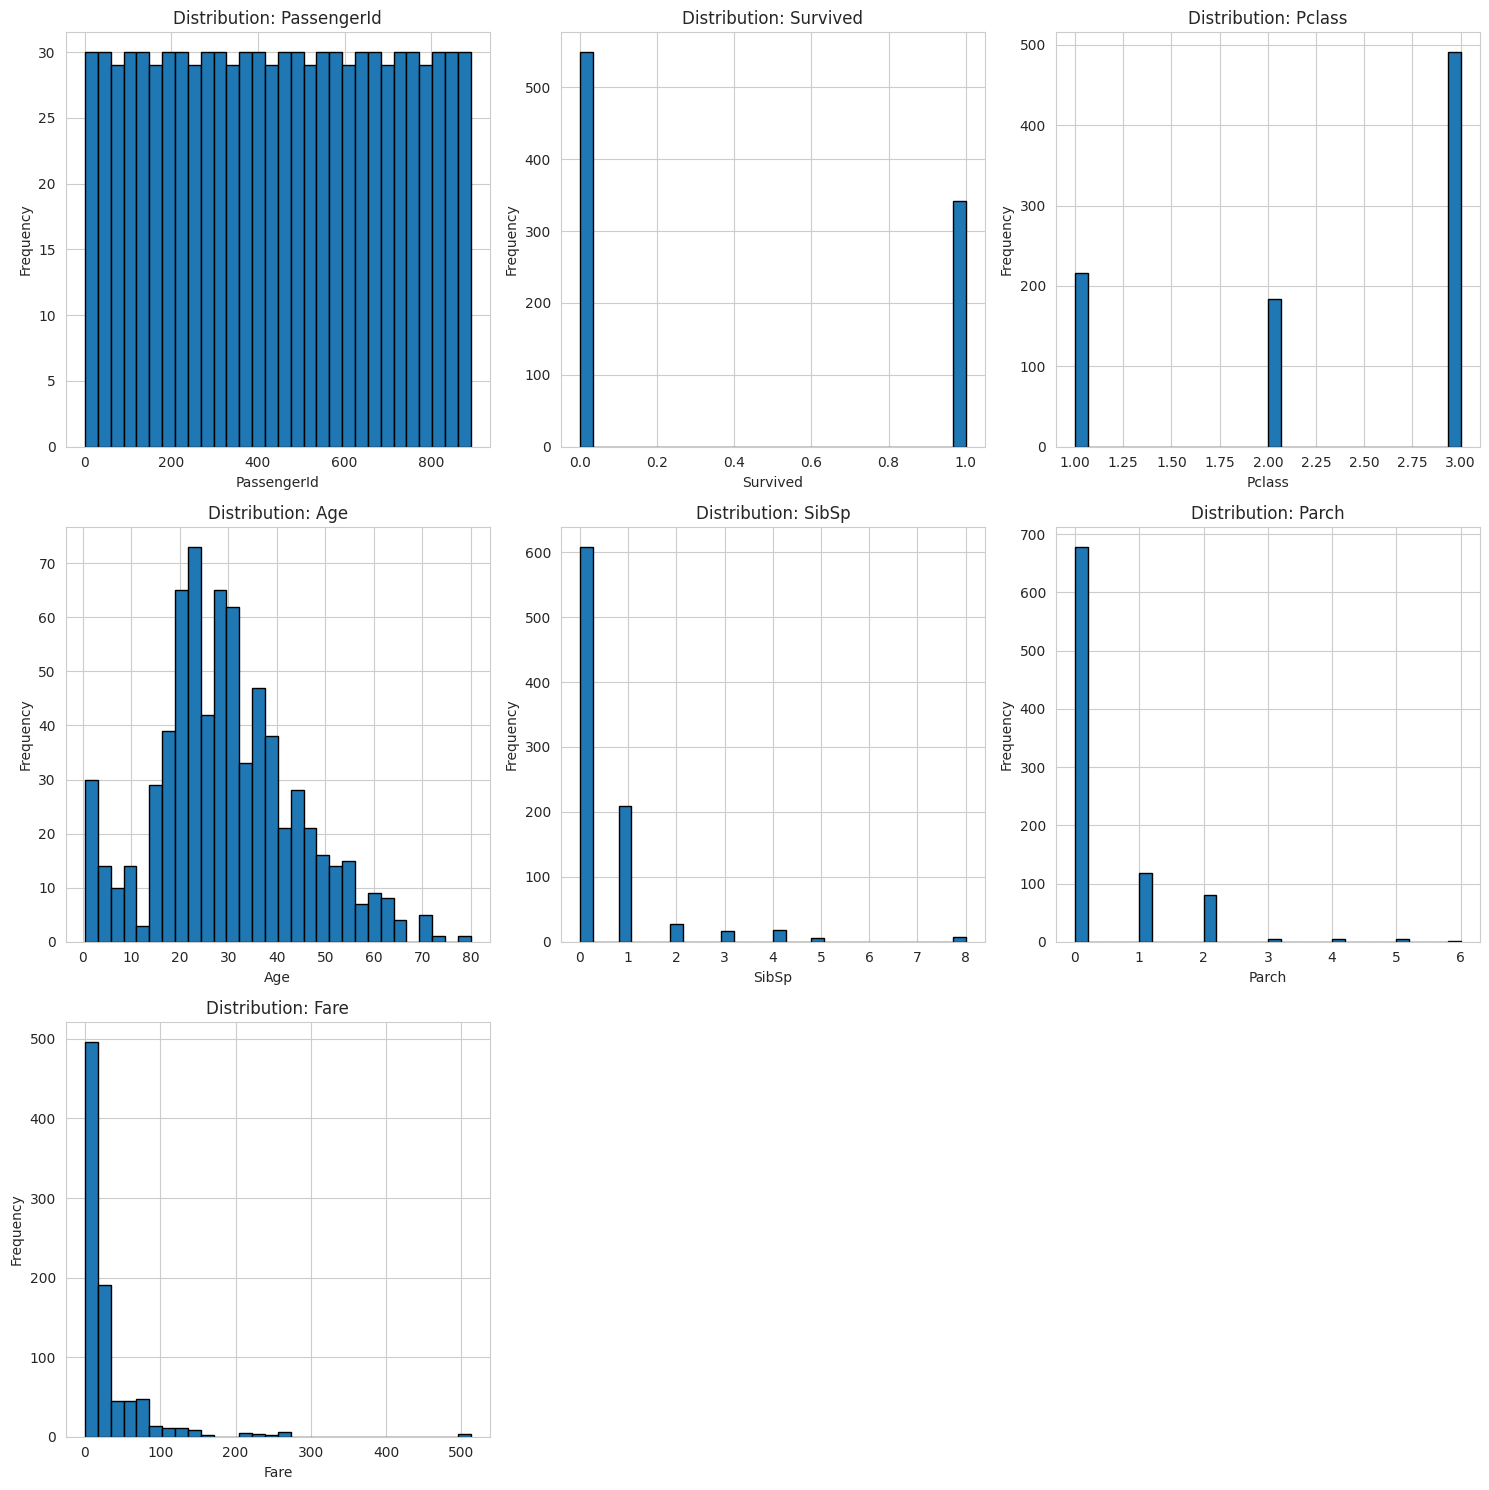

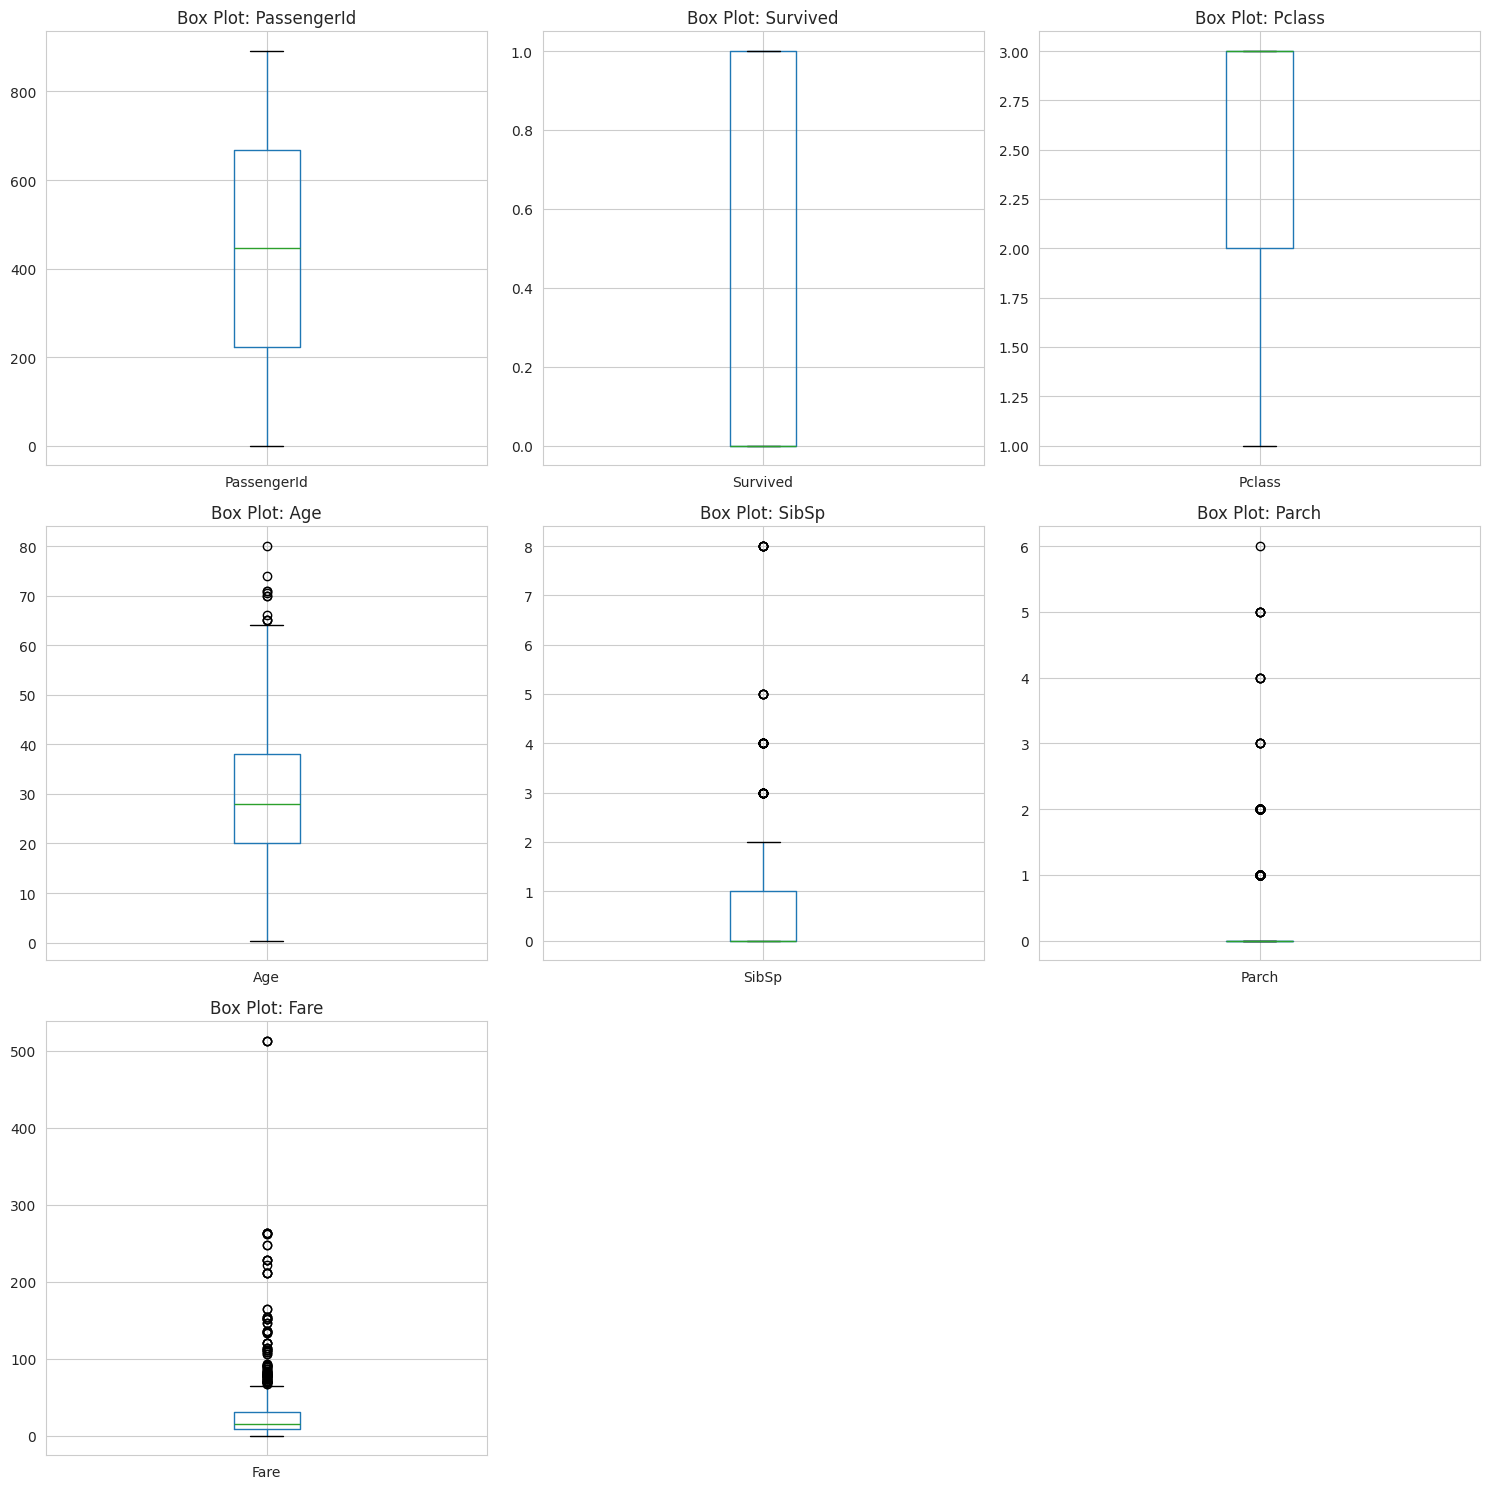


📊 CATEGORICAL FEATURES ANALYSIS
----------------------------------------------------------------------


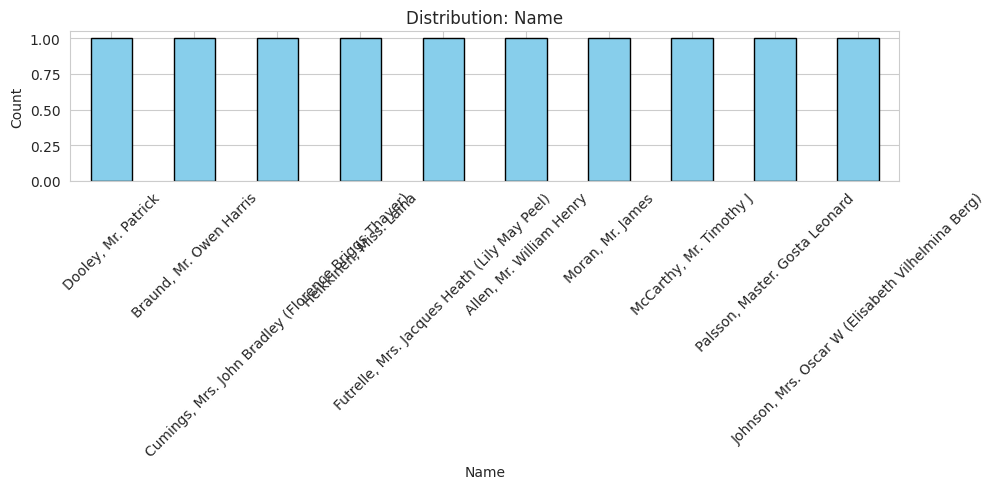

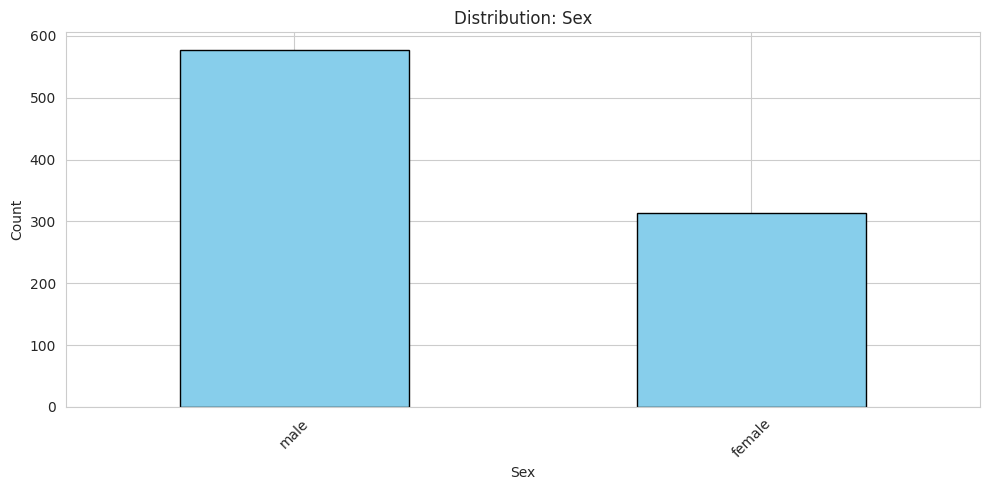

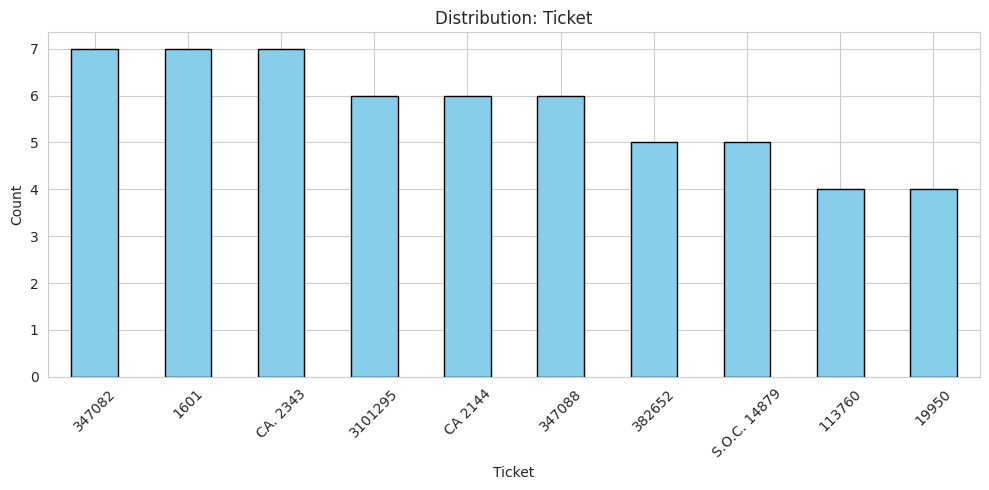

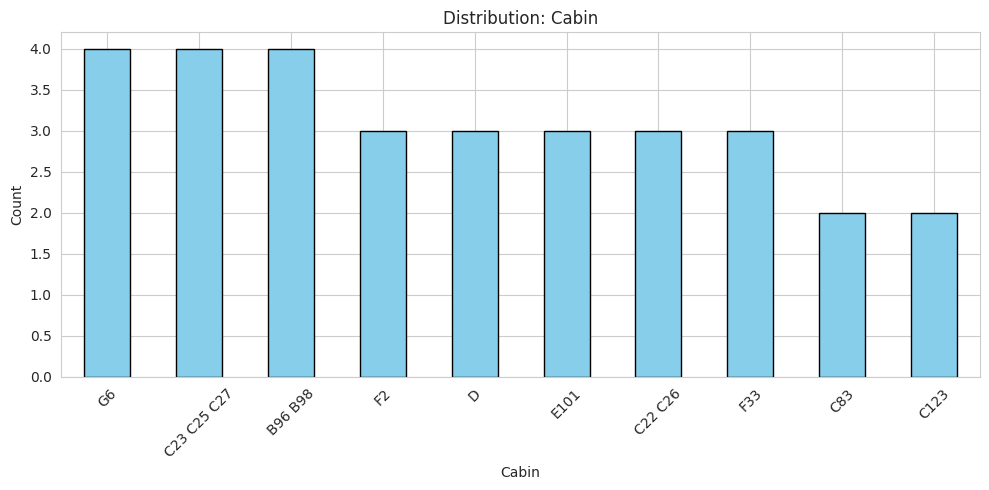

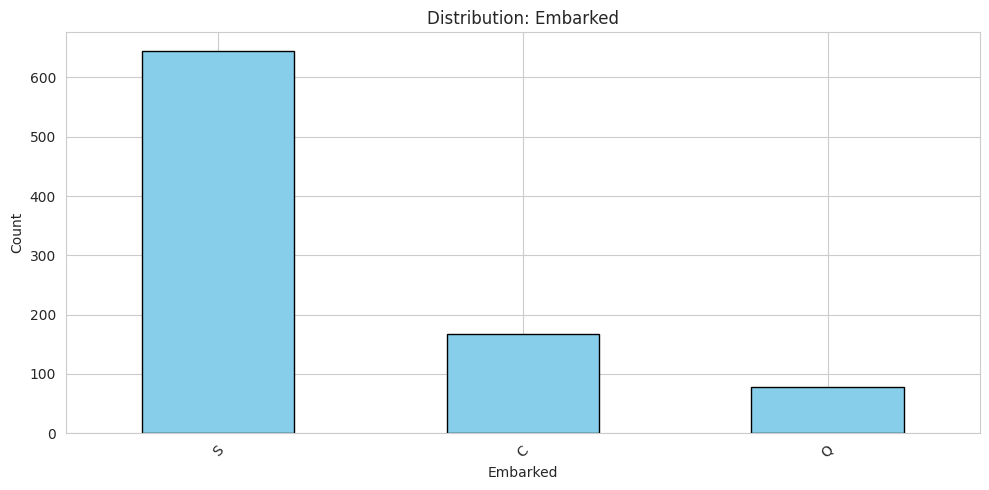


🔥 CORRELATION HEATMAP
----------------------------------------------------------------------


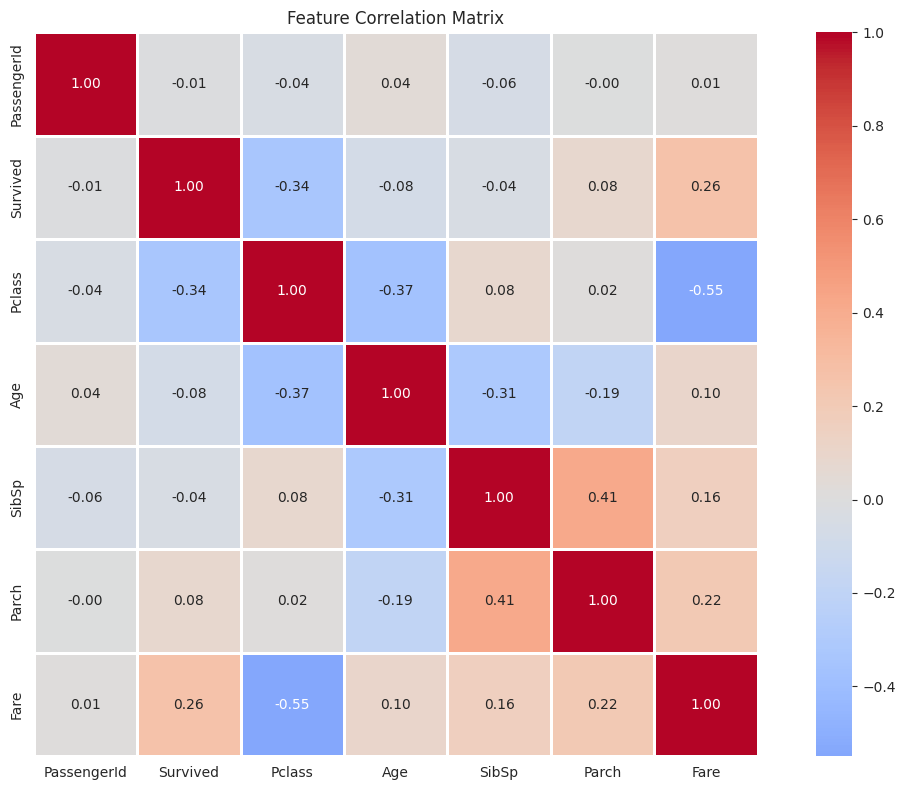


📈 PAIRWISE RELATIONSHIPS (Sample)
----------------------------------------------------------------------


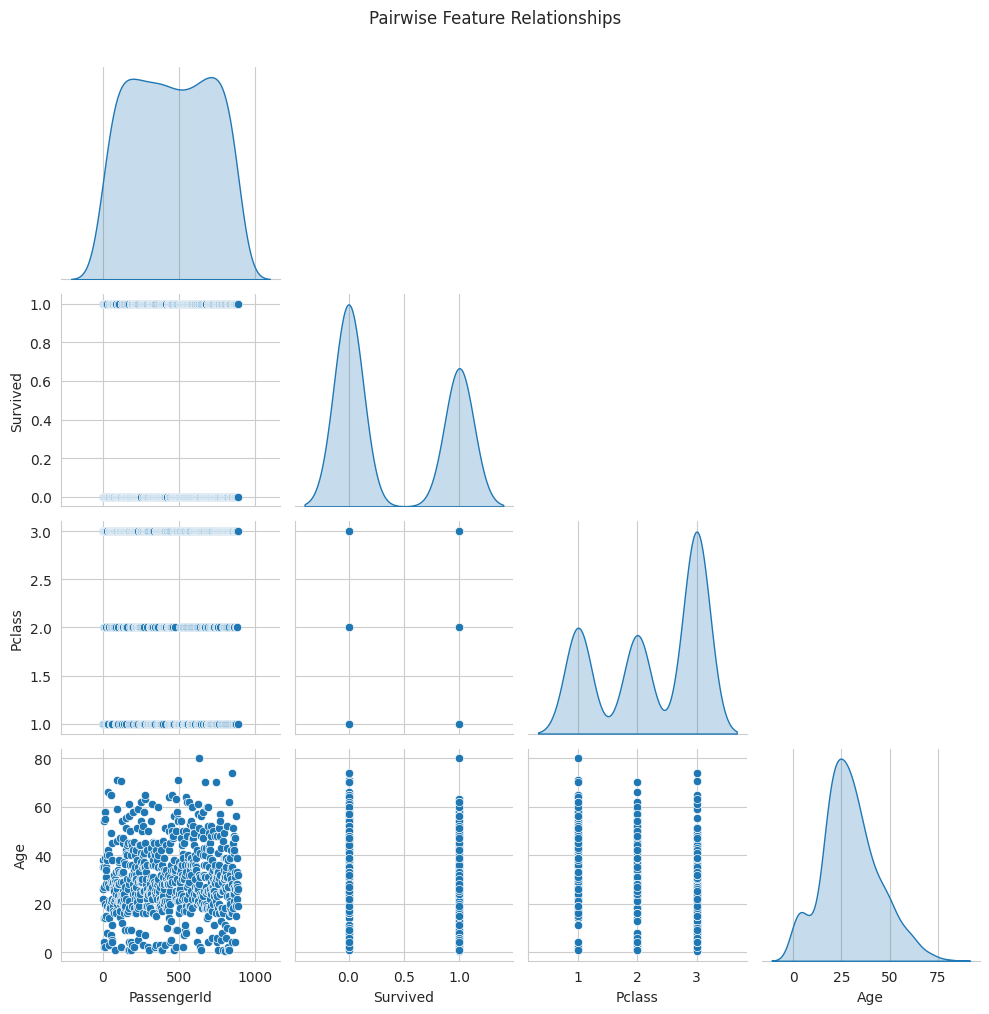


📌 Press Enter to continue to Model Selection...

                       MODEL PREPARATION MODULE                       

📍 Select Target Column:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked

Enter the number of target column: 2

✅ Target column: 'Survived'
🎯 Problem Type: CLASSIFICATION (2 classes)

✅ Data prepared successfully!
   Training samples: 712
   Testing samples: 179
   Features: 11

📌 Press Enter to start model evaluation...

                       MODEL EVALUATION MODULE                        

🔬 Training and evaluating models...

✅ Logistic Regression: Accuracy = 0.8101
✅ Decision Tree: Accuracy = 0.7933
✅ Random Forest: Accuracy = 0.8436
✅ Gradient Boosting: Accuracy = 0.7989
✅ Support Vector Machine: Accuracy = 0.8156
✅ K-Nearest Neighbors: Accuracy = 0.8268
✅ Naive Bayes: Accuracy = 0.7989

📊 MODEL PERFORMANCE SUMMARY


,Model,Score,Precision,Recall,F1-Score,CV Mean,CV Std,Description
2,Random Forest,0.843575,0.843923,0.843575,0.841976,0.830001,0.022807,Ensemble of decision trees. Robust and handles...
5,K-Nearest Neighbors,0.826816,0.827128,0.826816,0.824768,0.818802,0.017067,Predicts based on nearest samples. Simple but ...
4,Support Vector Machine,0.815642,0.814800,0.815642,0.814563,0.822978,0.022824,Finds optimal hyperplane. Works well with high...
0,Logistic Regression,0.810056,0.809453,0.810056,0.809651,0.801921,0.035117,Linear model for binary/multi-class classifica...
3,Gradient Boosting,0.798883,0.798104,0.798883,0.796827,0.820201,0.018344,Sequential ensemble method. Often achieves hig...
6,Naive Bayes,0.798883,0.799832,0.798883,0.799257,0.776637,0.026101,Probabilistic classifier. Fast and works well ...
1,Decision Tree,0.793296,0.792387,0.793296,0.792613,0.769664,0.019045,Tree-based model that splits data. Easy to int...



📌 Press Enter to select your model and generate code...

                  MODEL SELECTION & CODE GENERATION                   

🎯 Available Models:
3. Random Forest (Score: 0.8436)
6. K-Nearest Neighbors (Score: 0.8268)
5. Support Vector Machine (Score: 0.8156)
1. Logistic Regression (Score: 0.8101)
4. Gradient Boosting (Score: 0.7989)
7. Naive Bayes (Score: 0.7989)
2. Decision Tree (Score: 0.7933)

Enter the number of your preferred model: 3

✅ Selected Model: Support Vector Machine
   Score: 0.8156
   Finds optimal hyperplane. Works well with high-dimensional data.

                            GENERATED CODE                            

📝 Complete, production-ready code:

"""
Professional Machine Learning Pipeline
Model: Support Vector Machine
Problem Type: CLASSIFICATION
Generated by Auto DS System
"""

# ============================================================================
# PART 1: IMPORT LIBRARIES
# ========================================================================

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


                           SYSTEM COMPLETE                            

✅ All tasks completed successfully!
✅ Your model code has been generated and downloaded.

Thank you for using the Automated Data Science System! 🚀



In [ ]:
if __name__ == "__main__":
    run_auto_ds_system()